This research aims to help the gym chain Model Fitness customer interaction strategy project by analyzing the customer profiles and come up with a customer retention strategy.

* <a href="#Step 1">Download the data ></a><br>
    * <a href="#head">Data Head</a><br>
    * <a href="#shape">Data Shape</a><br>
    * <a href="#info">Data Info</a><br>
        * <a href="#step1Conclusion">Conclusion</a><br>
* <a href="#Step 2">Exploratory Data Analysis</a><br>
    * <a href="#describe">Proportion of Dataset</a><br>
    * <a href="#feature_hist">Feature distribution in Histogram</a><br>
    * <a href="#corr_matrix">Correlation Matrix of the features</a><br>
    * <a href="#chainchar">What characterizes chains?</a><br>
        * <a href="#step2conclusion">Conclusion</a><br>
* <a href="#Step 3">Build a model to predict user churn</a><br>
    * <a href="#data2train">Divide the data to train</a><br>
    * <a href="#2model">Train the model with two methods</a><br>
    * <a href="#precision">Evaluate accuracy, precision and recall </a><br>
       * <a href="#step3conclusion">Conclusion</a><br>
* <a href="#Step 4">Create user clusters</a><br>
    * <a href="#linked">Build a matrix of distances</a><br>
    * <a href="#train_cluster">Train the clustering model with the K-means</a><br>
    * <a href="#cluster_mean">Mean feature values for clusters</a><br>
    * <a href="#cluster_dist">Distributions of features for the clusters</a><br>
    * <a href="#churn_rate">Churn rate for each cluster</a><br>
       * <a href="#step4conclusion">Conclusion</a><br>
* <a href="#Step 5">Conclusions and Recommendations</a><br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from chart_studio import plotly
from plotly import graph_objects as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
init_notebook_mode(connected=True)

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

<p><a name="Step 1"></a></p>

### Step 1. Download the data

In [3]:
try:
    gym = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 12/gym_churn_us.csv', sep = ',')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

<p><a name="head"></a></p>

In [4]:
#open the head of the dataframe
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#open the tail of the dataframe
gym.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


<p><a name="shape"></a></p>

In [6]:
#check the size of the dataframe
gym.shape

(4000, 14)

In [7]:
# check if there are duplicated values
gym.duplicated().sum()

0

<p><a name="info"></a></p>

In [8]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<p><a name="step1 Conclusion"></a></p>

### Step 1 Conclusion

Our Dataset has 4000 rows and  14 columns.All the values are in numeric type and. we dont have duplicated value. The dataframe is clean and ready for manipulation.

<p><a name="Step 2"></a></p>

### Step 2. Carry out exploratory data analysis (EDA)

* *Look at the dataset: does it contain any missing features?*


In [9]:
#check if there are Nan values in the dataframe
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

The dateset does not have missing values or features.

<p><a name="describe"></a></p>

In [10]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


By calling the describe function it would be easier to see the statistical feature of the dataframe specially the mean and the std of each columns.

In [11]:
churn_group = gym.groupby('Churn').mean()
churn_group

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<p><a name="feature_hist"></a></p>

* *Plot bar histograms and feature distributions for those who left (churn) and those who stayed.*

In [17]:
fig = px.histogram(gym, x='gender', color = 'Churn',
                   title='Gender vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['green', 'blue'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title='gender' )
fig.show()


When plotting a histogram graph of the gender distribution to churn i noticed that the churn rate for both genders are almost equal i could mean that the churn rate for this case has nothing to do with the gender.

In [18]:
fig = px.histogram(gym, x='Near_Location', color = 'Churn',
                   title='Location vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['red', 'yellow'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Near_Location" )
fig.show()


In [19]:
fig = px.histogram(gym, x="Partner", color = 'Churn',
                   title='Partner vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['orange', 'yellowgreen'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Partner" )
fig.show()


The churn rate of the members who are not part of any partner companys is higher than the one who are part of partner companys, maybe it has something to do with the discount that the gym is giving to them.

In [20]:
fig = px.histogram(gym, x="Promo_friends", color = 'Churn',
                   title='Promo_friends vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['darkviolet', 'firebrick'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Promo_friends" )
fig.show()


The churn rate of the members who did not sign a 'promo_friends' is higher compared to the ones who did .The promo helps the retention of the members

In [21]:
fig = px.histogram(gym, x="Phone", color = 'Churn',
                   title='Phone vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['purple', 'green'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Phone" )
fig.show()


When plotting a distribution graph for members who provided a phone number to churn, more number of members who provided phone number but still left so phone number is not a factor in this case.

In [22]:
fig = px.histogram(gym, x="Contract_period", color = 'Churn',
                   title='Contract_period vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['steelblue', 'yellow'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Contract_period" )
fig.show()

When looking at the distribution between contract period and churn rate, we noticed that the members who signed for shorter membership contract  has a higher tendncy of churn. 

In [23]:
fig = px.histogram(gym, x="Group_visits", color = 'Churn',
                   title='Group_visits vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['green', 'blue'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Group_visits" )
fig.show()


Looking at the plot of Group_visit distribution vs churn rate, I found out that the members who did not participates in any group session has higher tendency of leaving.

In [24]:
fig = px.histogram(gym, x="Age", color = 'Churn',
                   title='Age vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['red', 'blue'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Age" )
fig.show()



When considering the Age factor and plotting a graph, i noticed that the members who age 30 and below has highest churn rate. It could be with the fact that young members is busier so other activities than in the gym.

In [25]:
fig = px.histogram(gym, x="Avg_additional_charges_total", color = 'Churn',
                   title='Avg_additional_charges_total vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['yellow', 'green'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Age" )
fig.show()

If we look at the distribitiom of the average additiona charges total distribution vs churn, we can see that the total number churn of members who spent 0-150 additional charges is higher than the one who spent more.

In [26]:

fig = px.histogram(gym, x="Month_to_end_contract", color = 'Churn',
                   title='Month_to_end_contract vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['mediumvioletred', 'blue'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Month_to_end_contract" )
fig.show()

Plotting the graph of distribution for Month_to end_contract vs churn.WE could crearly see that the members who had 1 month left to the contract had the highest number of churn.

In [27]:
fig = px.histogram(gym, x="Lifetime", color = 'Churn',
                   title='Lifetime vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['yellow', 'deeppink'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Lifetime" )
fig.show()


When looking at the distribution of Lifetime vs Churn. We could see that the highest rate of churn members who visited the gym withing the past 0-1 month.

In [28]:
fig = px.histogram(gym, x="Avg_class_frequency_total", color = 'Churn',
                   title='Avg_class_frequency_total vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['orange', 'blue'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Avg_class_frequency_total" )
fig.show()


The distribution of average class frequency total to churn shows that the members who had average lesser than 2.5 days a week visit in the gym had more tendency to chrun.

In [29]:
fig = px.histogram(gym, x="Avg_class_frequency_current_month", color = 'Churn',
                   title='Avg_class_frequency_current_month vs Churn',
                   labels={'Churn'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['green', 'yellow'] # color of histogram bars
                   )
fig.update_layout(yaxis_title="Churn count", xaxis_title="Avg_class_frequency_current_month" )
fig.show()


Looking at the monthly distribution, it shows the members who visited the gym once a months had the highest number of churn it means the lesser number of visit to the gym the higher tendency to churn.

<p><a name="corr_matrix"></a></p>

* *Build a correlation matrix and display it.*


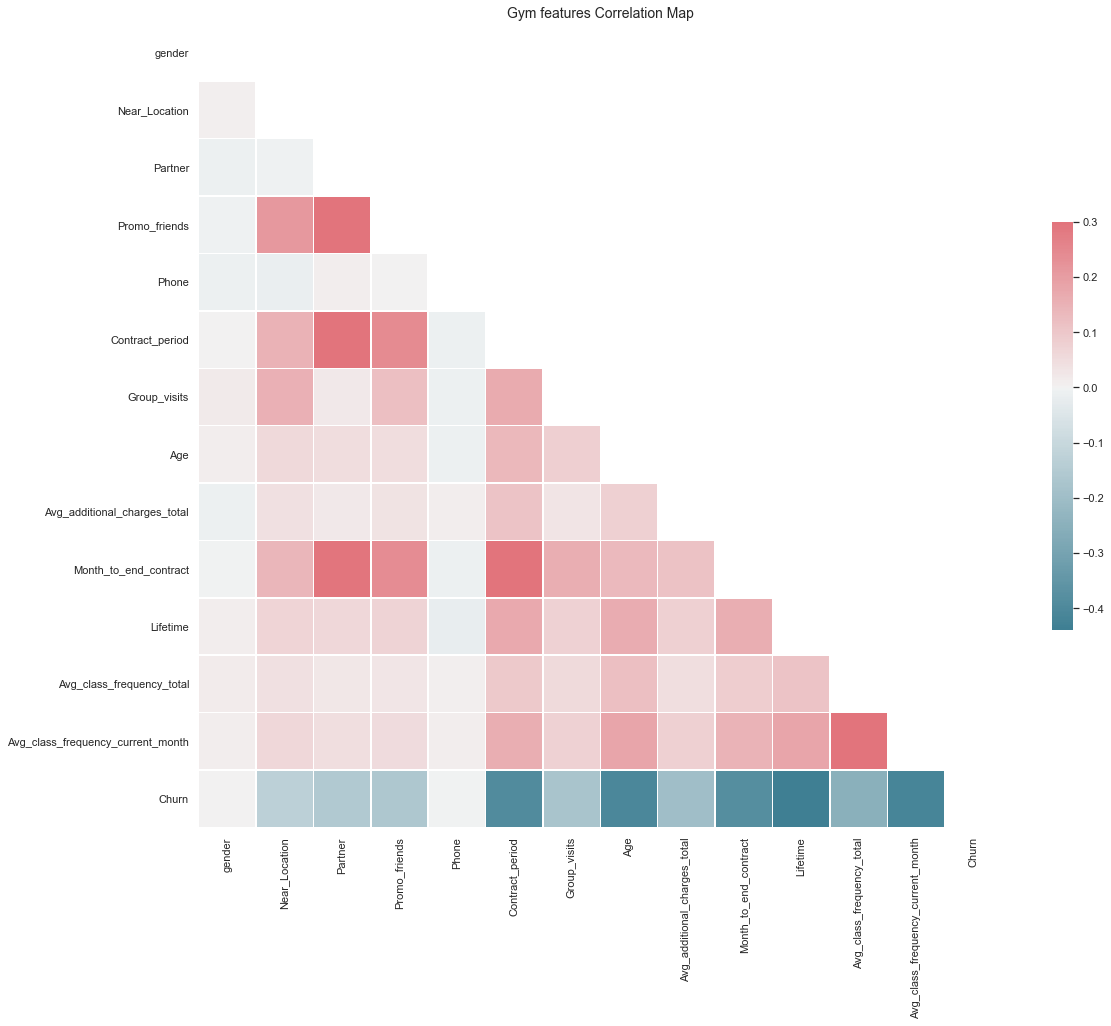

In [25]:

#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = gym.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Gym features Correlation Map', size = 14)
plt.show()

By building the correlation Matrix of independent cariables, it would be easier to see which variables that are possibly correlated to each other.Since we are only focusing on Churn rates. we can see it here that the columns 'contract_period, Age, Month_to_end_contract, Lifetime and avg_class_frequency_current month had the strongest negative correlations.

<p><a name="Step2conclusion"></a></p>

**Step 2 Conclusion**

In step i plotted histograms of all features and dataframe to Churn rate, for us to be able to see which factors might affect the churn of the member of gym. The features shows us the gender doesnt have correlation to churn since the number of churn to both gender is almost equal, providing the phone number is also not a factor.The location, discount promos given to member who are part of a partner company and who avail promo_friends code, Group_visit and  avg_class_frequency could play a role but the ones that has strongest correlation to Churn are Contract_period, Age, Month_to end_contract, Lifeme and avg_class_frequency_current_month.

### Step 3. Build a model to predict user churn

<p><a name="Step 3"></a></p>

In [27]:
#Remove the unnecessary columns 
cleaned_gym = gym = gym.drop(['gender'], axis=1)

In [28]:
#Look at the number of rows and cols in the new data set
cleaned_gym.shape

(4000, 13)

In [29]:
#Scale the cleaned dataset
X = cleaned_gym.drop('Churn', axis = 1) 
y = cleaned_gym['Churn']

<p><a name="data2train"></a></p>

* *Divide the data into train and validation sets*

In [30]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<p><a name="2model"></a></p>

* *Train the model on the train set with two methods:*

In [31]:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

In [32]:
def mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))  # calculate MAPE
    return mape

<p><a name="precision"></a></p>

* *Evaluate accuracy, precision, and recall for both models using the validation data.*

In [33]:
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: ', model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\n')

# write a loop that outputs metrics for each model
for i in models:
    print(i)
    model = i
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score (y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score (y_test, y_pred)))

LogisticRegression(random_state=0)
Accuracy: 0.91
Precision: 0.82
Recall: 0.79
RandomForestClassifier(random_state=0)
Accuracy: 0.92
Precision: 0.86
Recall: 0.81


Base on the result of precision and recall for logisticregressor and random forest model, it turns out the the best model for our data is RandomForestClassifier since it has higher precision and recall rate.

<p><a name=">Step 3 conclusion"></a></p>

#### Step 3 Conclusion
    
   We build the model first by removing the column that is unecessary which is the gender and phone.and creatin a new dataframe.Then i split tha new dataframe using train test split, by using the classification accuracy of the algorithin, we tested 2 models and i turned out that RandomForestClassifier yields higher Precision and recall.
   
<p><a name=">Step 4"></a></p>

### Step 4.Create user clusters

* *Standardize the data.*

In [34]:
#Standardizing/scaling the features
scaler = StandardScaler()

# train the scaler and transform the matrix for the train set
X_train_st = scaler.fit_transform(x_train)

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(x_test)

<p><a name="linked"></a></p>

* *Build a matrix of distances based on the standardized feature matrix* 

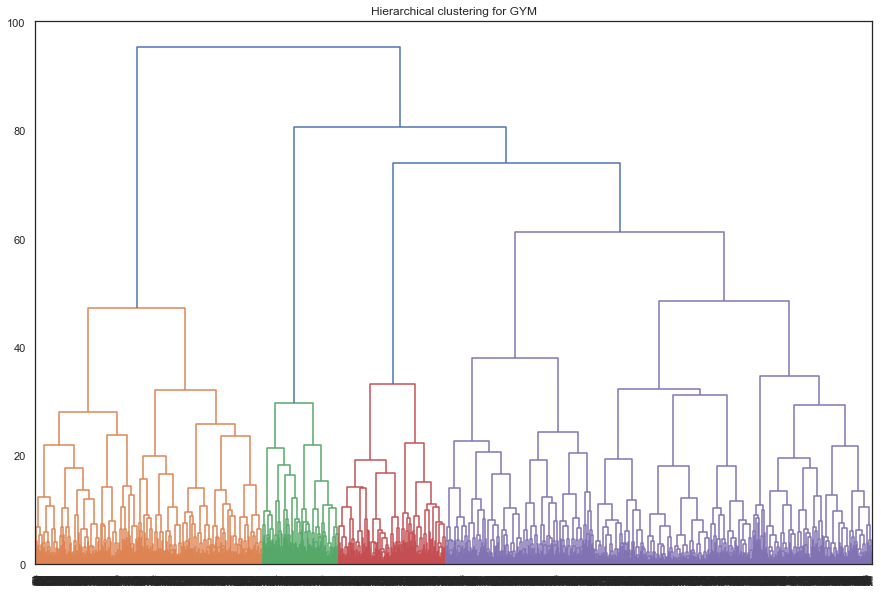

In [35]:
# import the clustering model classes
linked = linkage(X_train_st, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

as shown in the plot the suggested optimal number of clusters is 5, this corresponds to the five different colors on the plot.

<p><a name="train_cluster"></a></p>

* *Train the clustering model with the K-means algorithm and predict customer clusters.*

In [37]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(cleaned_gym)

# store cluster labels in the field of our dataset
cleaned_gym['cluster'] = labels

<p><a name="cluster_mean"></a></p>

* *Look at the mean feature values for clusters. Does anything catch your eye?*

In [38]:
# check the value of feature per cluster
cluster_group = cleaned_gym.groupby('cluster').mean()
cluster_group

,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,
0,0.838835,0.451456,0.279612,0.897087,4.298058,0.406796,28.978641,105.898648,3.993204,3.552427,1.851958,1.707873,0.333981
1,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
2,0.825412,0.488846,0.293889,0.908826,4.201746,0.387973,28.903977,35.566628,3.858390,3.386033,1.837345,1.693017,0.350145
3,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
4,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


 When checking the mean feature values of the clusters i noticed that cluster 1 has the highest number of average additional charges which is 356 and they are also the oldest group in terms of age.

V<p><a name="cluster_dist"></a></p>

* *Plot distributions of features for the clusters. Do you notice anything?*

In [42]:
# columns for overlap
numerical_col = ['Age','Avg_additional_charges_total','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']

# create subplots
fig = make_subplots(rows=3, cols=2,subplot_titles=numerical_col)

r = 1
c = 1
idx = 1
legend = True

# for every plot
for i in numerical_col:
    # add cluster data
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 0')[i], name='cluster0', legendgroup='cluster0',
                               marker = {'color':'Red'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 1')[i],name='cluster1', legendgroup='cluster1',
                               marker = {'color':'Orange'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 2')[i],name='cluster2', legendgroup='cluster2',
                               marker = {'color':'Yellow'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 3')[i],name='cluster3', legendgroup='cluster3',
                               marker = {'color':'Green'},showlegend=legend),row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 4')[i],name='cluster4', legendgroup='cluster4',
                               marker = {'color':'Blue'},showlegend=legend),row=r, col=c)
    # rotate to next row col
    legend = False
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    idx = idx+1
    

fig.update_layout(barmode='overlay', height=1000)
fig.update_traces(opacity=0.65)
fig.show()

# columns for group
group_columns = ['Near_Location','Phone', 'Partner','Promo_friends','Contract_period',
             'Group_visits','Month_to_end_contract']

# create subplots
fig = make_subplots(rows=4, cols=2,subplot_titles=group_columns)

idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True


# for every plot
for i in group_columns:
    # add cluster data
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 0')[i],name='cluster0', legendgroup='cluster0',
                               marker = {'color':'Red'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 1')[i],name='cluster1', legendgroup='cluster1',
                               marker = {'color':'Orange'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 2')[i], name='cluster2', legendgroup='cluster2',
                               marker = {'color':'Yellow'},showlegend=legend), row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 3')[i],name='cluster3', legendgroup='cluster3',
                               marker = {'color':'Green'},showlegend=legend),row=r, col=c)
    fig.add_trace(go.Histogram(x=cleaned_gym.query('cluster == 4')[i],name='cluster4', legendgroup='cluster4',
                               marker = {'color':'Blue'},showlegend=legend),row=r, col=c)
    # rotate to next row col
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
    
fig.update_xaxes(type="category", row=3, col=2)
fig.update_layout(barmode='group', height=1200)
fig.show()


<p><a name="churn_rate"></a></p>

In [41]:
# create pivot table where it is separated by cluster and calculated based on churn
churn_pivot = cleaned_gym.pivot_table(index='cluster', values='Churn', 
                               aggfunc=['count', 'sum', lambda x: abs(round(((x == 1).sum() / x.count()-1)*100,2))]).reset_index()
churn_pivot.columns = ['cluster', 'total entries', 'churn sum', 'churn rate (%)']
display(churn_pivot)

,cluster,total entries,churn sum,churn rate (%)
0,0,1030,344,66.60
1,1,271,12,95.57
2,2,1031,361,64.99
3,3,962,218,77.34
4,4,706,126,82.15


Lookign at the churn rate distribution of clusters, we could see that cluster 1 had the highest chrun rate which is 95.57% , cluster 4 and 3 has high tendency to churn.


<p><a name=">Step 4 conclusion"></a></p>

#### Step 4 Conclusion
    
   In this chapter we standardized and train the dataset, we build matrix of distances on the standardized data and by plotting dendogram, we found out that we can singles out 5 cluster.With that we build 5 clusters using K-means.By plotting the feature distribution of each cluster and calculating the churn rate, i found out that Cluster 1 had the highest rate, they are also the cluster who spent the most avg_additional_charges_total, they are the oldest cluster in terms of age, thier lifetime is around 1-2 months, a lot of them has 1 month before the contract ends.
   
<p><a name=">Step 4"></a></p>

### Step 5. Conclusions and basic recommendations

After studying the dataset, i was able to come up with the following conclusions and recommendations.

* For acquiring new customers, focus on aquiring partner the company that are within the vicinity range of the gym, our data shows that most of our members who stayed are the once who are part of partner companies and location is one factor for them also and so therefore i would be easier for them to go to the gym after work. 
* I also found out that the members who are in age range of 30 and above are less likely to churn and majority of those age range are on the working class.

* For group activities those members that participated in the group activities are less likely to churn compared to the ones that dont, so i suggest we should create and encourage more group activities because it will encourage the members to come back often because they need to join the activities and as we know that the higher the frequency of visit, the higher is the chance of the retention of members.

* With discounts and promos we could see in the distribution plot above that it is also a factor with churn rate because the members who were able to get discounts like company partnership and promo_friend is more likely to stay than the ones who pay regular fee. Since lifetime and  and length of contract plays a major role to i would suggest that the we should create discount offers to long term contracts as this would encourage customers to sign up for long term contract instead of the shorter ones.For members whos mebership is about to expire in (1-2) months, it would be great if could offer them discount promo for them to renew the membership as part of the loyalty bonus.

* For additional services like for example, the gym can create a small cafe or maybe a spa where members relax after the gym. It would also be nice if we can have discounts for members as this would encourage members to spend on additional services. 

